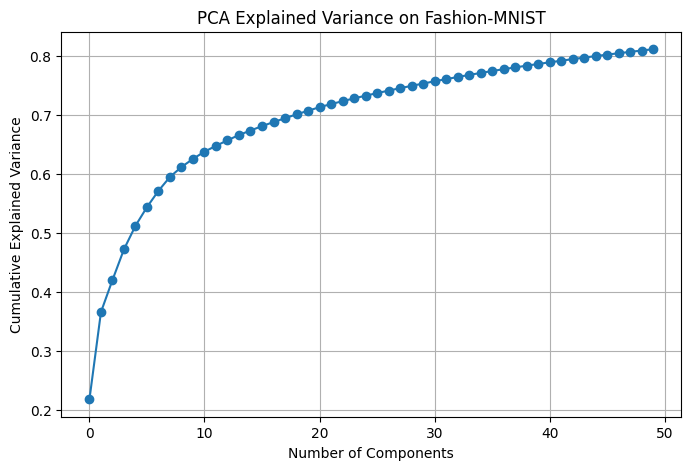

Variance explained by 2 PCs: 36.60%


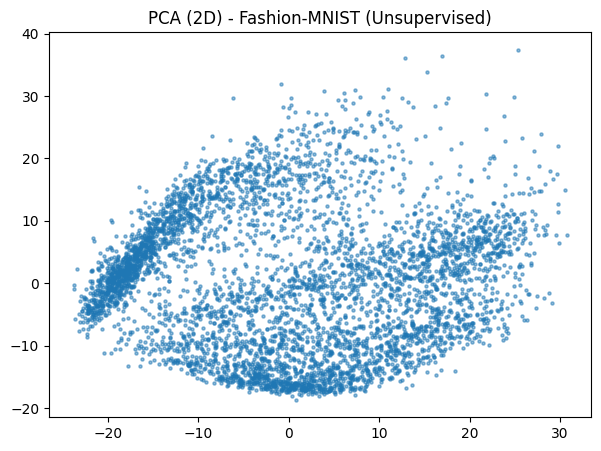

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.008s...
[t-SNE] Computed neighbors for 5000 samples in 1.046s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 6.176180
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.414413
[t-SNE] KL divergence after 1000 iterations: 1.333431
t-SNE KL Divergence: 1.3334


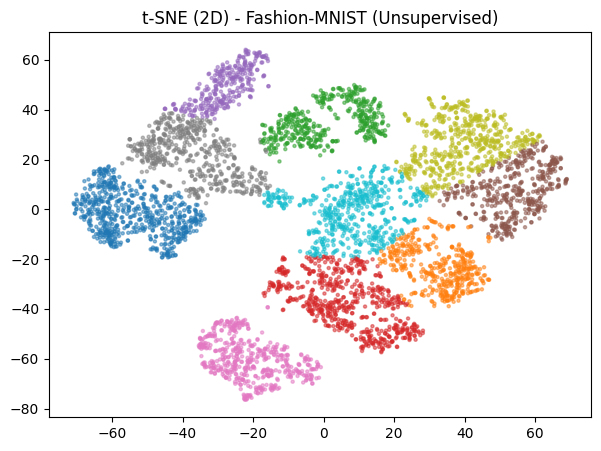

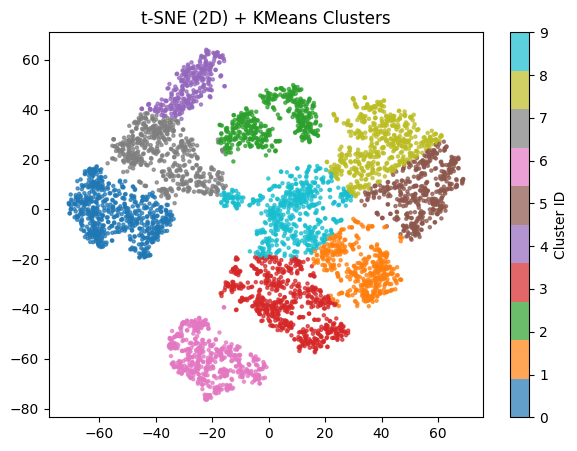

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist

(X_train,y_train),(_,_)=fashion_mnist.load_data()

X=X_train.reshape(-1,784)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X[:5000])

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance on Fashion-MNIST")
plt.grid(True)
plt.show()

print(f"Variance explained by 2 PCs: {explained_variance[:2].sum()*100:.2f}%")

pca_2d = PCA(n_components=2).fit_transform(X_scaled)
plt.figure(figsize=(7,5))
plt.scatter(pca_2d[:,0], pca_2d[:,1], s=5, alpha=0.5)
plt.title("PCA (2D) - Fashion-MNIST (Unsupervised)")
plt.show()

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42, verbose=1)
X_tsne = tsne.fit_transform(X_scaled)
print(f"t-SNE KL Divergence: {tsne.kl_divergence_:.4f}")

plt.figure(figsize=(7,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], s=5, alpha=0.5)
plt.title("t-SNE (2D) - Fashion-MNIST (Unsupervised)")
plt.show()

from sklearn.cluster import KMeans

# Run KMeans on the t-SNE result
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)  # 10 clusters (since Fashion-MNIST has 10 classes)
y_kmeans = kmeans.fit_predict(X_tsne)

# Plot with cluster colors
plt.figure(figsize=(7,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_kmeans, cmap="tab10", s=5, alpha=0.7)
plt.title("t-SNE (2D) + KMeans Clusters")
plt.colorbar(label="Cluster ID")
plt.show()


In [4]:
!pip install --upgrade scikit-learn

In [6]:
import sklearn
print(sklearn.__version__)

1.7.1
